## Ch02-statlearn-lab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2.4 Exercise (question 8)
This exercise relates to the College data set, which can be found in the file College.csv on the book website. It contains a number of variables for 777 different universities and colleges in the US. The variables are:

• Private : Public/private indicator

• Apps : Number of applications received

• Accept : Number of applicants accepted

• Enroll : Number of new students enrolled

• Top10perc : New students from top 10 % of high school class

• Top25perc : New students from top 25 % of high school class

• F.Undergrad : Number of full-time undergraduates

• P.Undergrad : Number of part-time undergraduates

• Outstate : Out-of-state tuition

• Room.Board : Room and board costs

• Books : Estimated book costs

• Personal : Estimated personal spending

• PhD : Percent of faculty with Ph.D.s

• Terminal : Percent of faculty with terminal degree

• S.F.Ratio : Student/faculty ratio

• perc.alumni : Percent of alumni who donate

• Expend : Instructional expenditure per student

• Grad.Rate : Graduation rate

(a) Use the pd.read_csv() function to read the data into Python. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.

In [ ]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 11.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=269bbdb5973a7c9de23ea5002777d1c810d2c24ae5e319cab5c676b74b16f561
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.formula.api as smf
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)
from scipy.stats import t
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from functools import partial
from sklearn.model_selection import \
     (cross_validate, KFold, ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.formula.api as smf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
college = pd.read_csv("/content/drive/MyDrive/Machine_learning/ALL CSV FILES - 2nd Edition/College.csv")

(b) Look at the data used in the notebook by creating and running a new cell with just the code college in it. You should notice that the first column is just the name of each university in a column named something like Unnamed: 0. We don’t really want pandas to treat this as data. However, it may be handy to have these names for later. Try the following commands and similarly look at the resulting data frames:

college2 = pd.read_csv('College.csv', index_col =0)

college3 = college.rename ({'Unnamed: 0': 'College '}, axis = 1)

college3 = college3.set_index('College')

In [ ]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
college2 = pd.read_csv('/content/drive/MyDrive/Machine_learning/ALL CSV FILES - 2nd Edition/College.csv', index_col =0)

college2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
college3 = college.rename ({'Unnamed: 0': 'College'}, axis = 1)

college3.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
college3 = college3.set_index('College')

college3.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(c) Use the describe() method of to produce a numerical summary of the variables in the data set.

In [ ]:
college3.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(d) Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of the first columns [Top10perc, Apps, Enroll]. Recall that you can reference a list C of columns of a data frame A using A[C].

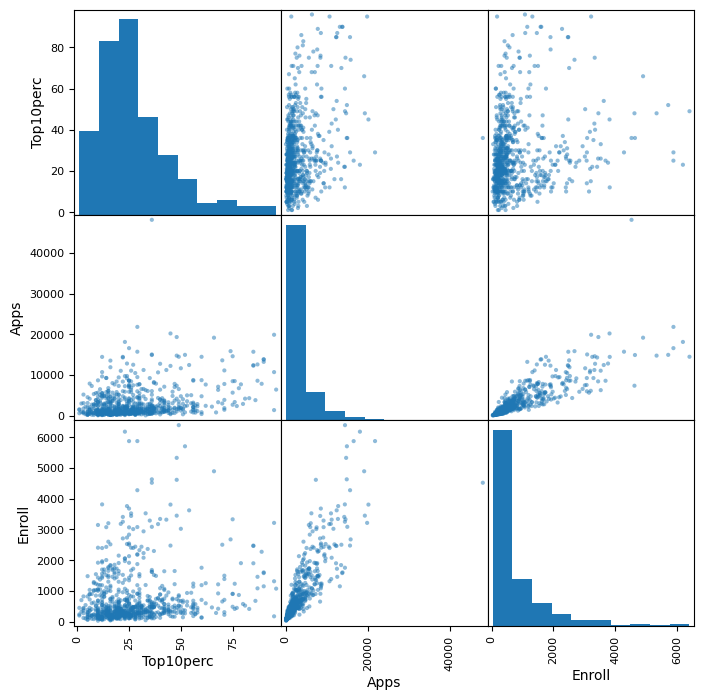

In [ ]:
first_columns = college3[['Top10perc', 'Apps', 'Enroll']]

pd.plotting.scatter_matrix(first_columns, figsize=(8, 8))

plt.show()

(e) Use the boxplot() method of college to produce side-by-side boxplots of Outstate versus Private.

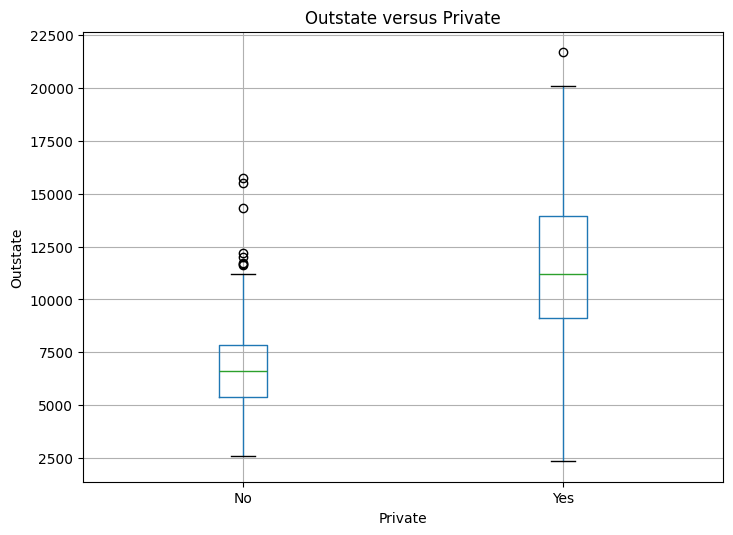

In [ ]:
college3.boxplot(column='Outstate', by='Private', figsize=(8, 6))

plt.title('Outstate versus Private')
plt.suptitle('')
plt.xlabel('Private')
plt.ylabel('Outstate')
plt.show()

(f) Create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on whether or not the proportion of students coming from the top 10% of their highschool classes exceeds 50%.

In [ ]:
college3['Elite'] = 'No'
college3.loc[college3['Top10perc'] > 50, 'Elite'] = 'Yes'
college3['Elite'] = college3['Elite'].astype('category')

Use the value_counts() method of college['Elite'] to see how many elite universities there are. Finally, use the boxplot() method again to produce side-by-side boxplots of Outstate versus Elite.

In [ ]:
college3['Elite'].value_counts()

,count
Elite,
No,699
Yes,78


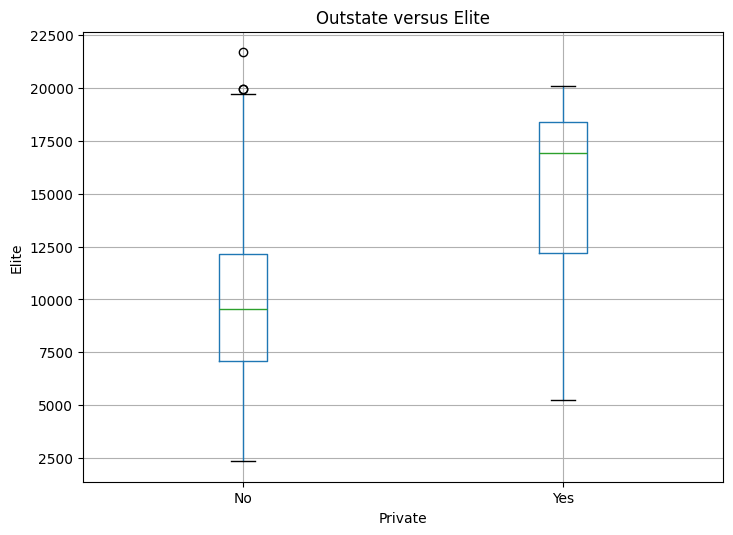

In [ ]:
college3.boxplot(column='Outstate', by='Elite', figsize=(8, 6))

plt.title('Outstate versus Elite')
plt.suptitle('')
plt.xlabel('Private')
plt.ylabel('Elite')
plt.show()

(g) Use the plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four plots can be made simultaneously. By changing the arguments you can divide the screen up in other combinations.

Text(0.5, 1.0, '')

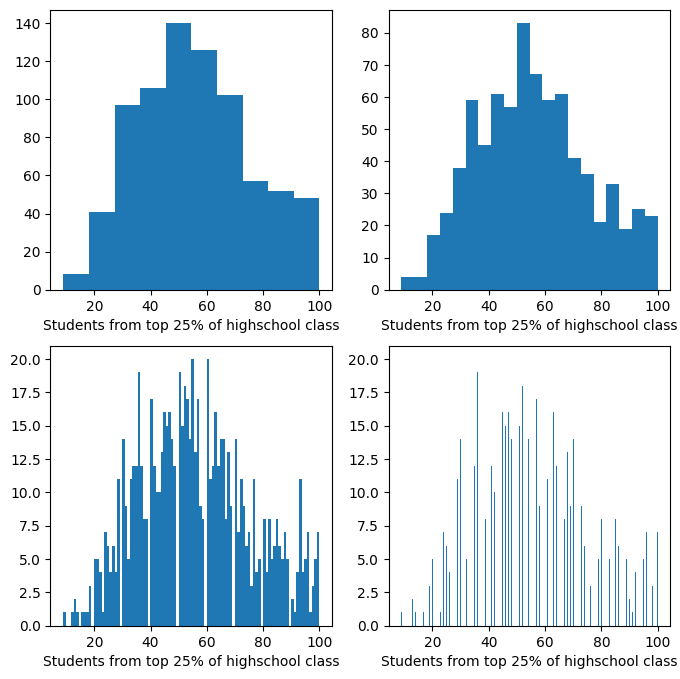

In [ ]:
np.random.seed(42)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axs[0, 0].hist(college3['Top25perc'])
axs[0, 0].set_xlabel("Students from top 25% of highschool class")
axs[0, 0].set_title("")

axs[0, 1].hist(college3['Top25perc'], bins=20)
axs[0, 1].set_xlabel("Students from top 25% of highschool class")
axs[0, 1].set_title("")

axs[1, 0].hist(college3['Top25perc'], bins=100)
axs[1, 0].set_xlabel("Students from top 25% of highschool class")
axs[1, 0].set_title("")

axs[1, 1].hist(college3['Top25perc'], bins=500)
axs[1, 1].set_xlabel("Students from top 25% of highschool class")
axs[1, 1].set_title("")


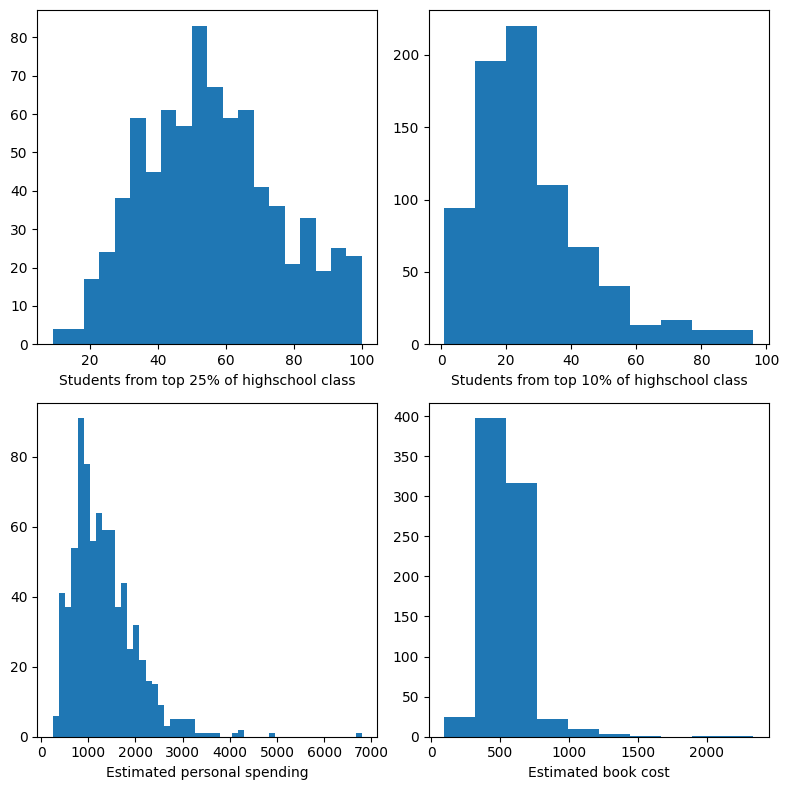

In [ ]:
np.random.seed(42)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axs[0, 0].hist(college3['Top25perc'], bins=20)
axs[0, 0].set_xlabel("Students from top 25% of highschool class")
axs[0, 0].set_title("")

axs[0, 1].hist(college3['Top10perc'])
axs[0, 1].set_xlabel("Students from top 10% of highschool class")
axs[0, 1].set_title("")

axs[1, 0].hist(college3['Personal'],bins=50)
axs[1, 0].set_xlabel("Estimated personal spending")
axs[1, 0].set_title("")

axs[1, 1].hist(college3['Books'])
axs[1, 1].set_xlabel("Estimated book cost")
axs[1, 1].set_title("")

plt.tight_layout()
plt.show()

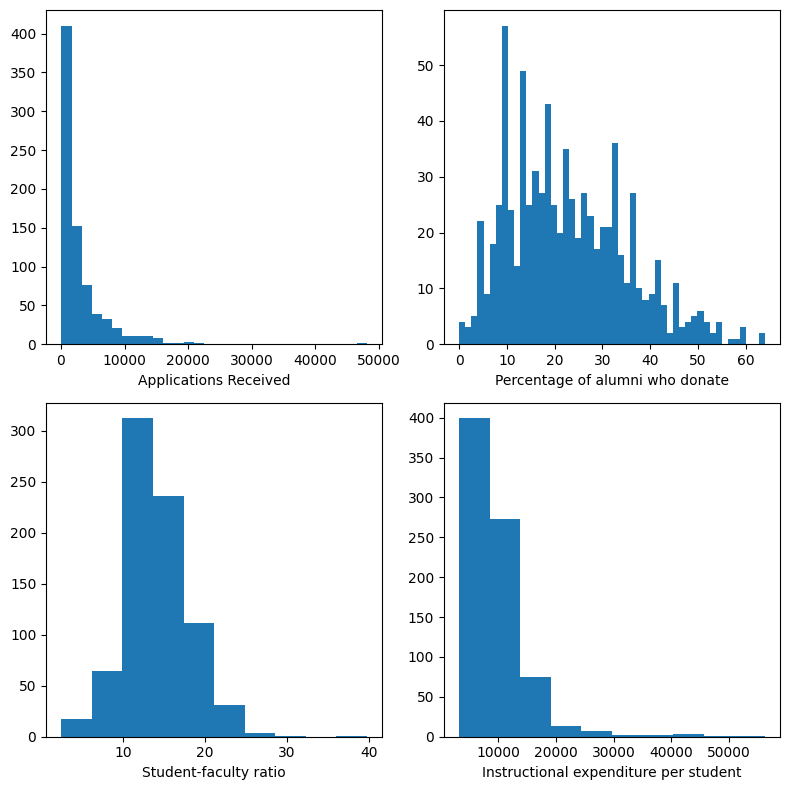

In [ ]:
np.random.seed(42)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axs[0, 0].hist(college3['Apps'], bins=30)
axs[0, 0].set_xlabel("Applications Received")
axs[0, 0].set_title("")

axs[0, 1].hist(college3['perc.alumni'], bins=50)
axs[0, 1].set_xlabel("Percentage of alumni who donate")
axs[0, 1].set_title("")

axs[1, 0].hist(college3['S.F.Ratio'])
axs[1, 0].set_xlabel("Student-faculty ratio")
axs[1, 0].set_title("")

axs[1, 1].hist(college3['Expend'])
axs[1, 1].set_xlabel("Instructional expenditure per student")
axs[1, 1].set_title("")

plt.tight_layout()
plt.show()


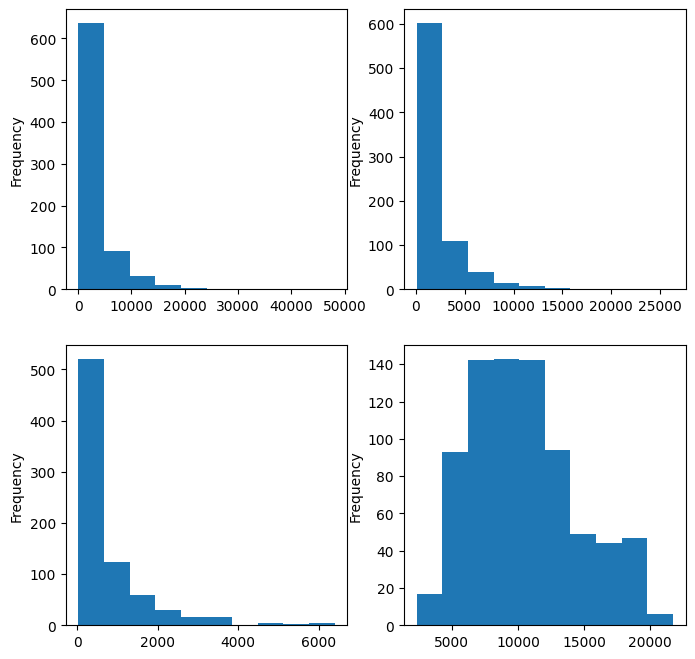

In [ ]:
fig, axes =plt.subplots(nrows=2,ncols= 2,figsize=(8,8))
college3['Apps'].plot.hist(ax=axes[0,0])
college3['Accept'].plot.hist(ax=axes[0,1])
college3['Enroll'].plot.hist(ax=axes[1,0])
college3['Outstate'].plot.hist(ax=axes[1,1]);

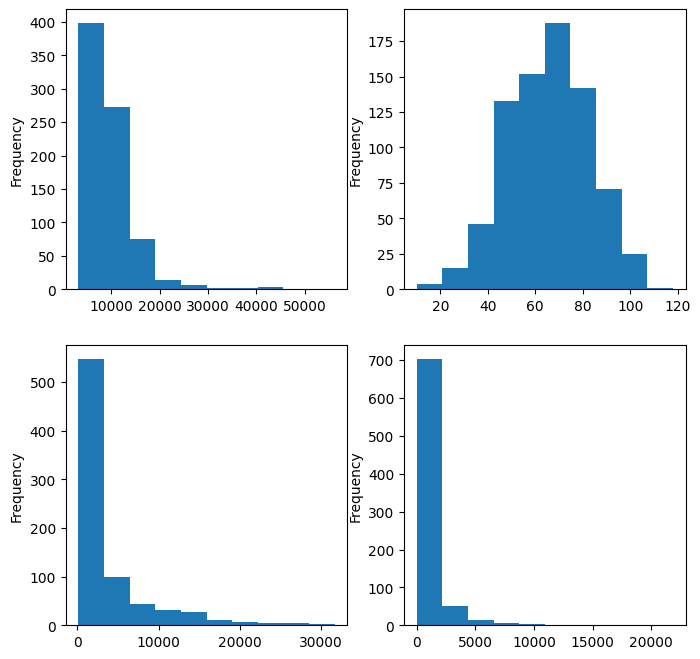

In [ ]:
fig, axes =plt.subplots(nrows=2,ncols= 2,figsize=(8,8))
college3['Expend'].plot.hist(ax=axes[0,0])
college3['Grad.Rate'].plot.hist(ax=axes[0,1])
college3['F.Undergrad'].plot.hist(ax=axes[1,0])
college3['P.Undergrad'].plot.hist(ax=axes[1,1]);

(h) Continue exploring the data, and provide a brief summary of what you discover.

In [ ]:
college3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    object  
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null 

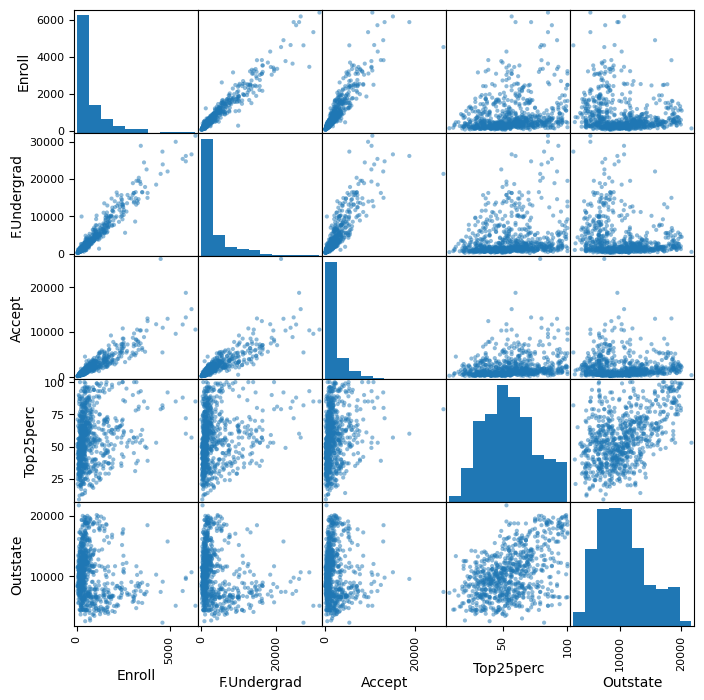

In [ ]:
other_columns = college3[['Enroll', 'F.Undergrad', 'Accept','Top25perc', 'Outstate']]

pd.plotting.scatter_matrix(other_columns, figsize=(8, 8))

plt.show()

 The variables with a positively correlation are Enroll, F.Undergrad and Accept. The relationships with Top25perc and Outstate and other variables look less evident.

In [ ]:
college3.corr(numeric_only=True)

The analysis above together with the correlation table above suggest that the following are correct.

1. Colleges with more applications accept and enroll more students.
2. Student quality metrics (top 10% and 25%) are strongly linked.
3. Higher instructional spending correlates with more PhD faculty.
4. More selective schools tend to have higher alumni donation rates.
5. Higher student/faculty ratios link to slightly lower alumni donations.
6. Graduation rates improve with higher student quality and spending.
7. Application numbers seem to have the most strong relationships with other variables.


However, this doesn't necessarily mean there is a direct causation.

## Ch03-linreg-lab

#### 3.7 Exercise (question 9)

This question involves the use of multiple linear regression on the Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [ ]:
Auto=load_data("Auto")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


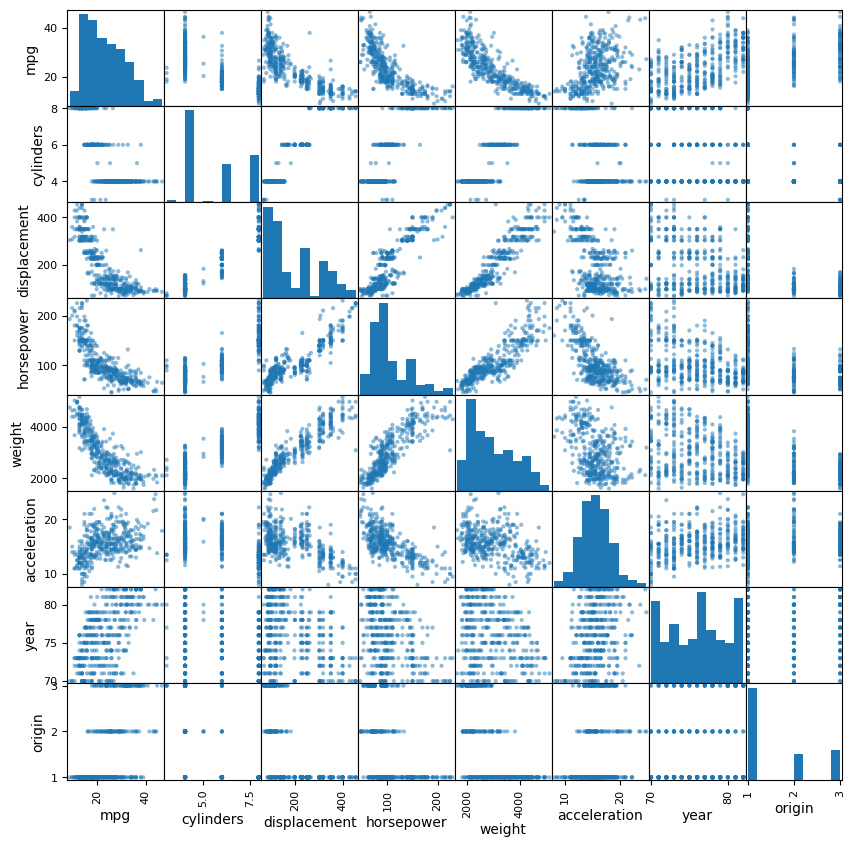

In [ ]:
pd.plotting.scatter_matrix(Auto, figsize=(10, 10));

(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [ ]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance:

i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

In [ ]:
y=Auto['mpg']
terms=Auto.columns.drop(['mpg'])
X=MS(terms).fit_transform(Auto)
model=sm.OLS(y,X)

In [ ]:
res=model.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [ ]:
res1=smf.ols('y~X',data=Auto).fit()
anova_lm(res1)

,df,sum_sq,mean_sq,F,PR(>F)
X,8.0,19576.082069,2447.010259,220.979533,1.326882e-138
Residual,384.0,4252.212530,11.073470,NaN,NaN


F statistic is very large and the regression coefficients are null we must reject the null hypothesis.

ii. Which predictors appear to have a statistically significant relationship to the response?

The only predictors that have significant relationship with mpg are displacement, weight, year and origin. Cylinders, horsepower and acceleration do not.

iii. What does the coefficient for the year variable suggest?

Newer cars are, on average, more fuel-efficient, with each additional year of production corresponding to a 0.75 mpg increase when other variables are held constant.


(d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

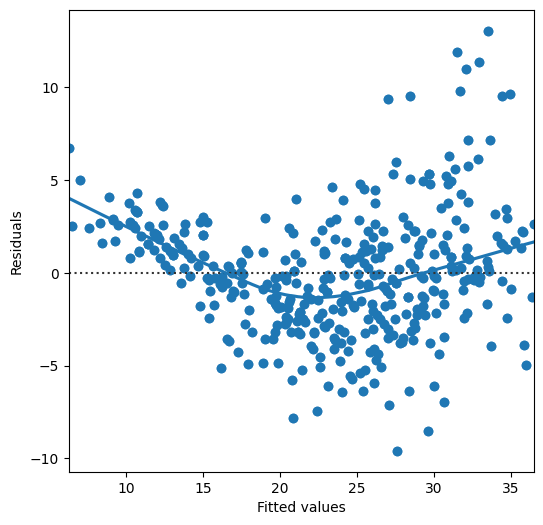

In [ ]:
ax=subplots(figsize=(6,6))[1]
ax.scatter(res.fittedvalues,res.resid)
sns.residplot(data=Auto,x=res.fittedvalues,y='mpg',lowess=True)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals");

np.int64(13)

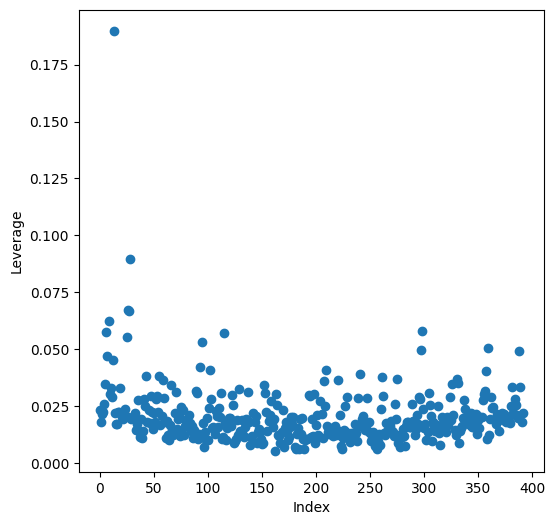

In [ ]:
infl = res.get_influence()
ax = subplots(figsize=(6,6))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [ ]:
n=Auto.shape[0]
leverage_thres=8/n
leverage_thres

0.02040816326530612

In [ ]:
infl.hat_matrix_diag[13]

np.float64(0.1899128860261589)

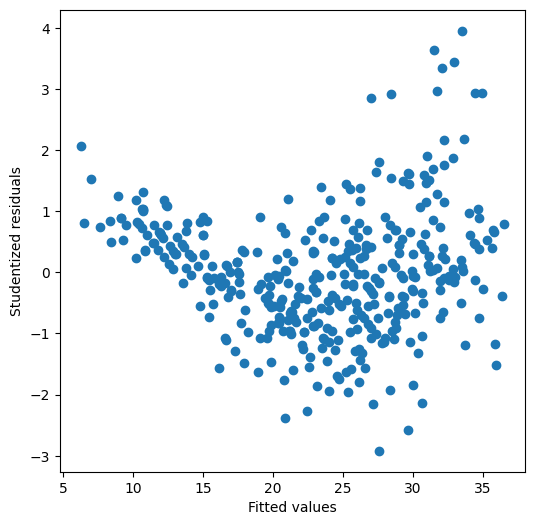

In [ ]:

ax=subplots(figsize=(6,6))[1]
studentized_residuals = res.get_influence().resid_studentized_internal
ax.scatter(res.fittedvalues,studentized_residuals)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Studentized residuals");

In [ ]:
df=pd.DataFrame({'fitted':res.fittedvalues,'studentized':studentized_residuals})
df[np.abs(df['studentized'])>3]

,fitted,studentized
name,,
volkswagen rabbit custom diesel,32.078967,3.344681
mazda glc,33.539573,3.951894
vw rabbit c (diesel),32.949224,3.444885
vw dasher (diesel),31.491864,3.631071


(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [ ]:
model2 = smf.ols(formula='mpg ~ displacement*origin + year', data=Auto)
print(summarize(model2.fit()))
model3 = smf.ols(formula='mpg ~ horsepower*weight +origin', data=Auto)
print(summarize(model3.fit()))

                        coef  std err       t  P>|t|
Intercept           -32.6362    4.725  -6.907  0.000
displacement          0.0065    0.009   0.712  0.477
origin                6.5265    0.946   6.902  0.000
displacement:origin  -0.0487    0.008  -5.785  0.000
year                  0.7494    0.056  13.418  0.000
                       coef   std err       t  P>|t|
Intercept          59.27830  2.718000  21.807  0.000
horsepower         -0.24080  0.027000  -8.852  0.000
weight             -0.00980  0.001000 -11.679  0.000
horsepower:weight   0.00005  0.000007   7.455  0.000
origin              0.93090  0.309000   3.017  0.003


(f) Try a few different transformations of the variables, such as $\log X$, $\sqrt X$, $X^2$ . Comment on your findings.

In [ ]:
model4 = smf.ols(formula='mpg ~ horsepower+np.log(weight) +origin', data=Auto)
print(summarize(model4.fit()))

                    coef  std err       t  P>|t|
Intercept       153.0507   11.717  13.062  0.000
horsepower       -0.0504    0.010  -5.018  0.000
np.log(weight)  -15.8235    1.543 -10.253  0.000
origin            1.0169    0.323   3.148  0.002


In [ ]:
model5 = smf.ols(formula='mpg ~ horsepower+np.sqrt(weight) +origin', data=Auto)
print(summarize(model5.fit()))

                    coef  std err       t  P>|t|
Intercept        57.5157    2.678  21.476    0.0
horsepower       -0.0500    0.011  -4.749    0.0
np.sqrt(weight)  -0.5678    0.059  -9.672    0.0
origin            1.1581    0.323   3.580    0.0


In [ ]:
model6 = smf.ols(formula='mpg ~ horsepower+np.power(weight,2) +origin', data=Auto)
print(summarize(model6.fit()))

                             coef       std err       t  P>|t|
Intercept            3.336930e+01  1.002000e+00  33.296    0.0
horsepower          -6.780000e-02  1.100000e-02  -5.909    0.0
np.power(weight, 2) -5.903000e-07  8.610000e-08  -6.854    0.0
origin               1.787200e+00  3.250000e-01   5.507    0.0


The p values of all the variables are less than 0.05 which suggest that all variables are statistically significant.

## Ch04-classification-lab

#### 4.8 Exercises (Question 14)

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:

Auto['mpg01 '] = mpg01


In [ ]:
Auto=load_data("Auto")
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
mpg01=np.where(Auto["mpg"]>Auto["mpg"].median(),1,0)
Auto['mpg01']=mpg01

(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.


In [ ]:
Auto.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


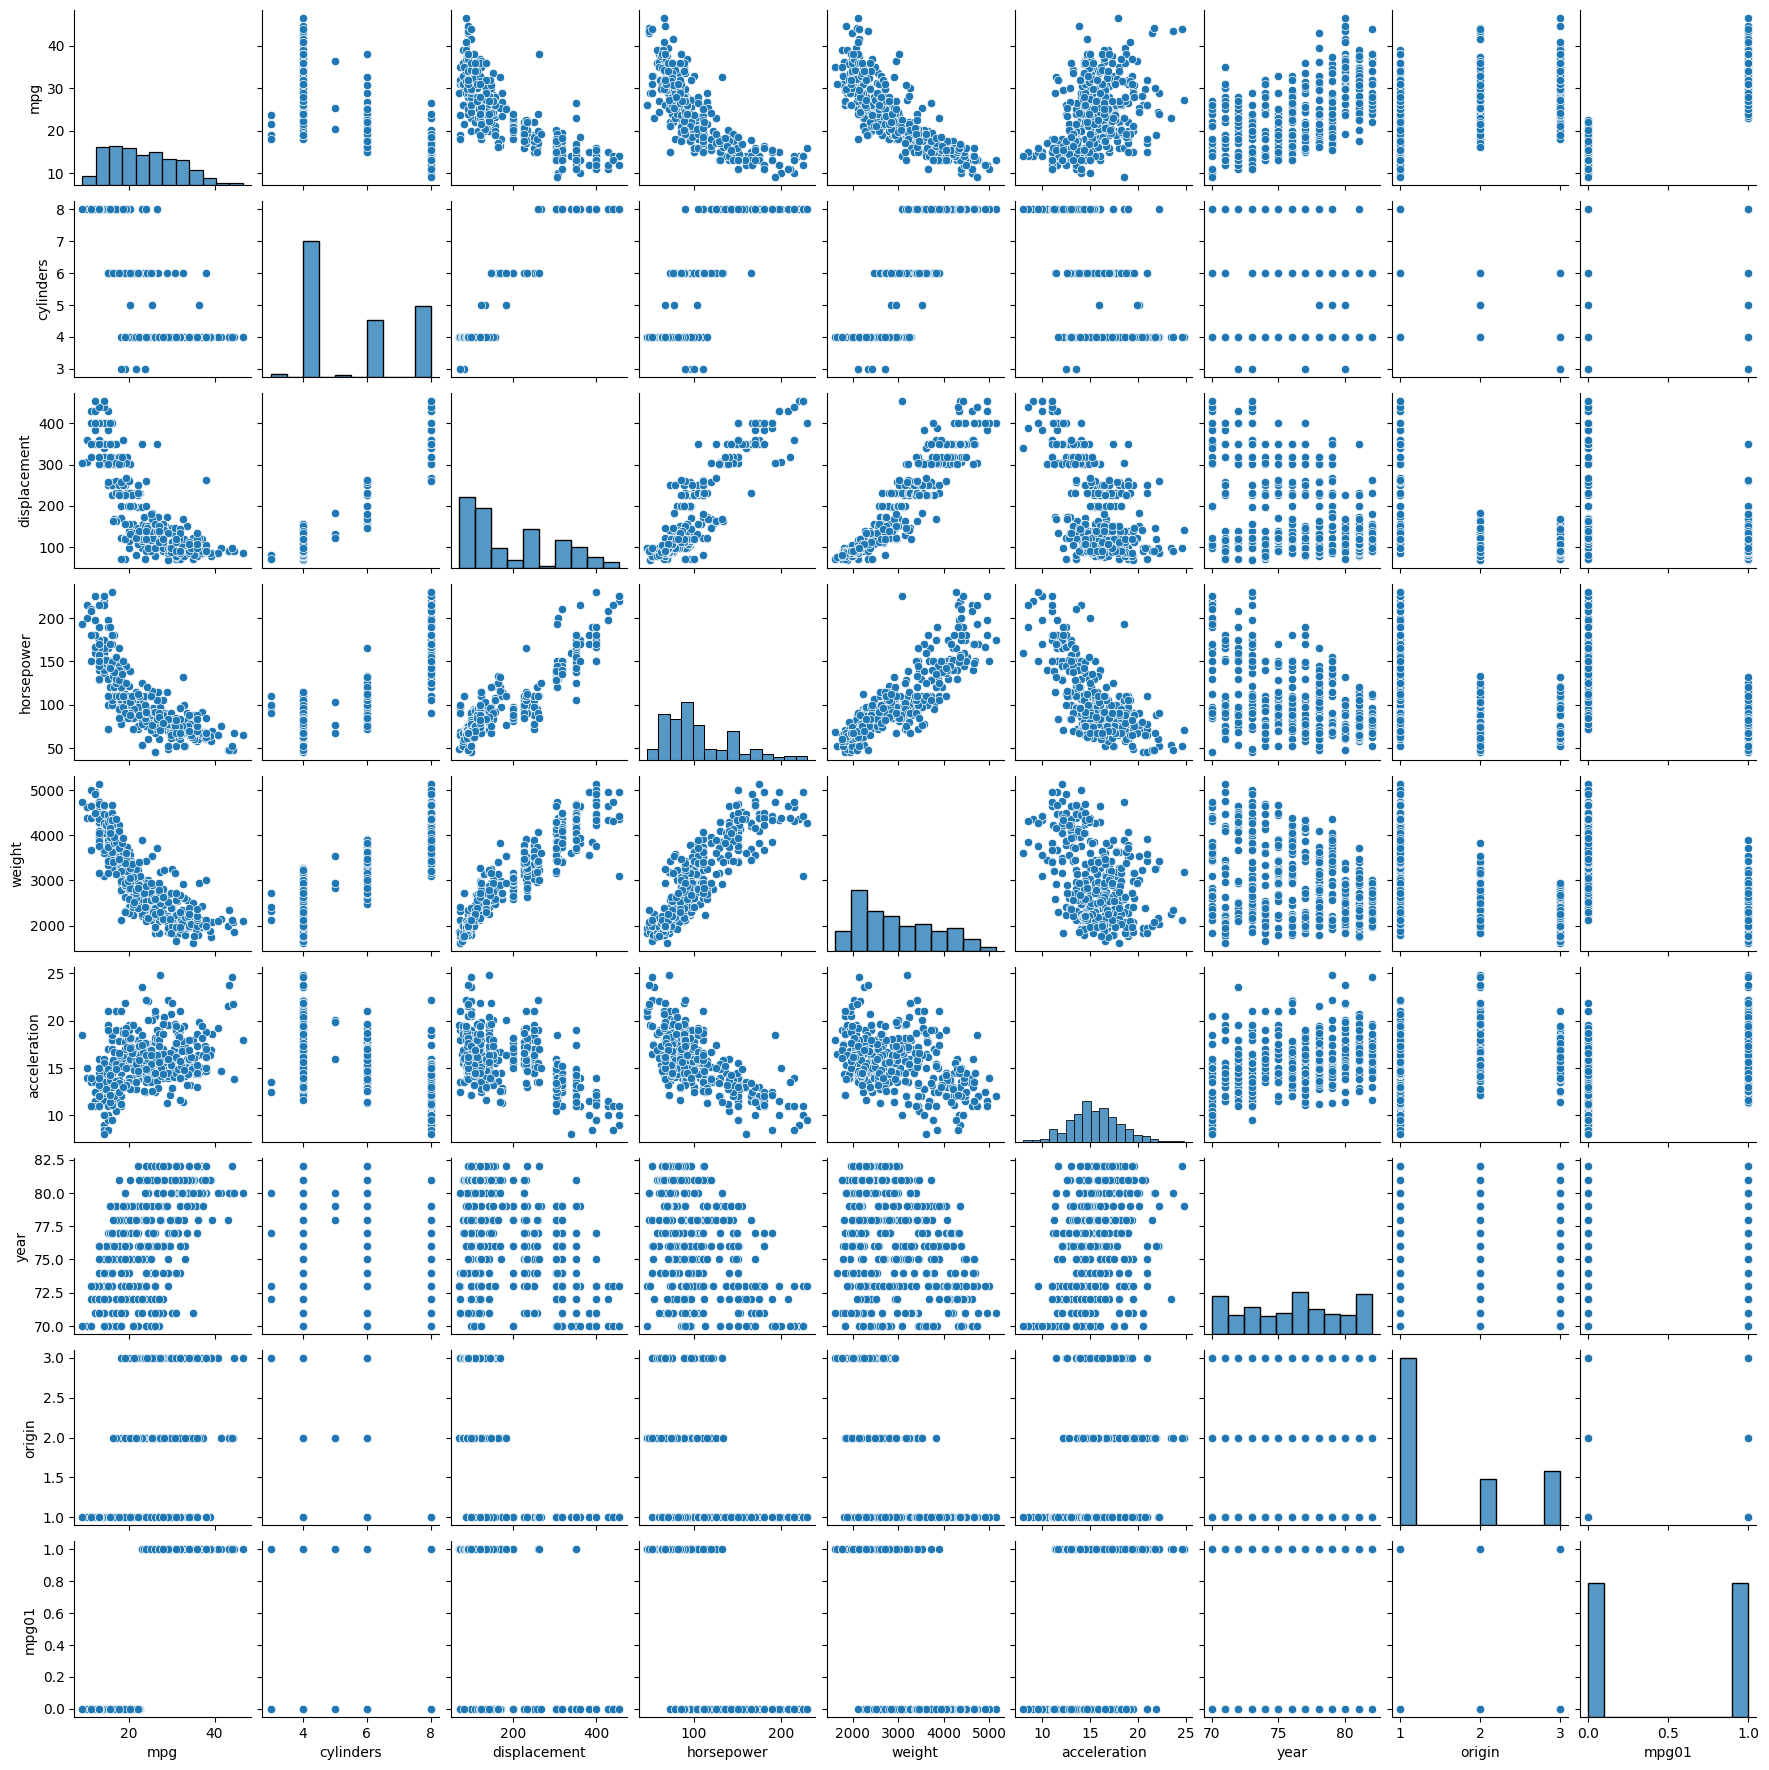

In [ ]:
sns.pairplot(Auto, height=2, aspect=1);

The correlation table shows that mpg01 has the strongest positive correlation with mpg (0.84), and the strongest negative correlations with cylinders (-0.76), displacement (-0.75), and weight (-0.76). This indicates that cars with more cylinders, larger engines, and heavier weight are less likely to have high fuel efficiency (mpg01 = 1). Therefore, weight, cylinders, and displacement seem most useful for predicting mpg01.

(c) Split the data into a training set and a test set.


In [ ]:
x=Auto[['weight','displacement','cylinders']].values
#the values attribute is used to convert x from a dataframe object to an array
y=Auto['mpg01'].values

In [ ]:
(X_train,X_test,y_train,y_test) = train_test_split(x,y,random_state=1)

(f) Perform logistic regression on the training data in order to pre-
dict mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [ ]:
lr=LogisticRegression()
result=lr.fit(X_train,y_train)
lr_test_error=1-accuracy_score(y_test, lr.predict(X_test))
lr_test_error

0.061224489795918324

The test error is approximately 0.06 which means that the results from the model are different from the actual, expected, or true values.

## Ch05-resample-lab.ipynb

### 5.4 Exercises

#### Question 5

In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.


In [ ]:
np.random.seed(1)
Default=load_data("Default")

In [ ]:
Default.default

,default
0,No
1,No
2,No
3,No
4,No
...,...
9995,No
9996,No
9997,No
9998,No


(a) Fit a logistic regression model that uses income and balance to
predict default.


In [ ]:
X = Default[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = Default['default'] == 'Yes'

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Nov 2025   Pseudo R-squ.:                  0.4594
Time:                        15:11:24   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

(b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.



In [ ]:
Default_train, Default_valid = train_test_split(Default, test_size=3000, random_state=0)
Default_valid

,default,student,balance,income
9394,No,Yes,0.000000,13911.441282
898,No,No,396.985985,55454.631040
2398,No,No,1046.416673,47598.307369
5906,No,No,836.343137,34559.158405
2343,No,Yes,534.692907,18729.566240
...,...,...,...,...
4004,No,No,1097.039083,40021.353015
7375,No,Yes,1766.649774,15423.437284
9307,No,Yes,1626.901421,11702.283496
8394,No,No,0.000000,28784.469237


ii. Fit a multiple logistic regression model using only the train-
ing observations.


In [ ]:
X = Default[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = Default['default'] == 'Yes'

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Nov 2025   Pseudo R-squ.:                  0.4594
Time:                        15:40:50   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

In [ ]:
X_valid=design_train.transform(Default_valid)
valid_pred = res.predict(X_valid)
labels=np.array(['No']*3000)
labels[valid_pred>0.5]='Yes'

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.

In [ ]:
y_valid = Default_valid['default']
1-accuracy_score(y_valid, labels)

0.040000000000000036

(c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Com-
ment on the results obtained.

In [ ]:
# first
Default_train, Default_valid = train_test_split(Default, test_size=5000, random_state=0)
Default_valid

,default,student,balance,income
9394,No,Yes,0.000000,13911.441282
898,No,No,396.985985,55454.631040
2398,No,No,1046.416673,47598.307369
5906,No,No,836.343137,34559.158405
2343,No,Yes,534.692907,18729.566240
...,...,...,...,...
3996,No,No,794.176213,43335.985041
5889,No,No,81.531865,40847.811311
4577,No,No,1137.791157,21103.429621
8600,No,No,646.081240,36686.959447


In [ ]:
X = Default[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = Default['default'] == 'Yes'

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 Nov 2025   Pseudo R-squ.:                  0.4594
Time:                        15:42:39   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

In [ ]:
X_valid=design_train.transform(Default_valid)
valid_pred = res.predict(X_valid)
labels=np.array(['No']*5000)
labels[valid_pred>0.5]='Yes'

In [ ]:
y_valid = Default_valid['default']
1-accuracy_score(y_valid, labels)

0.03979999999999995

In [ ]:
# second
Default_train, Default_valid = train_test_split(Default, test_size=7000, random_state=0)
Default_valid

,default,student,balance,income
9394,No,Yes,0.000000,13911.441282
898,No,No,396.985985,55454.631040
2398,No,No,1046.416673,47598.307369
5906,No,No,836.343137,34559.158405
2343,No,Yes,534.692907,18729.566240
...,...,...,...,...
766,No,No,1027.895035,21551.611090
5469,No,No,570.054699,42157.807712
959,No,Yes,945.479849,17279.286812
3816,No,No,1297.392431,47095.221566


In [ ]:
X_valid=design_train.transform(Default_valid)
valid_pred = res.predict(X_valid)
labels=np.array(['No']*7000)
labels[valid_pred>0.5]='Yes'

In [ ]:
y_valid = Default_valid['default']
1-accuracy_score(y_valid, labels)

0.039142857142857146

In [ ]:
# third
Default_train, Default_valid = train_test_split(Default, test_size=1000, random_state=0)
Default_valid

,default,student,balance,income
9394,No,Yes,0.000000,13911.441282
898,No,No,396.985985,55454.631040
2398,No,No,1046.416673,47598.307369
5906,No,No,836.343137,34559.158405
2343,No,Yes,534.692907,18729.566240
...,...,...,...,...
9319,No,No,751.354392,27179.761653
2662,No,No,1258.852277,33683.181733
6925,No,Yes,1338.659659,8078.176047
8070,No,Yes,1199.385586,18884.127471


In [ ]:
X_valid=design_train.transform(Default_valid)
valid_pred = res.predict(X_valid)
labels=np.array(['No']*1000)
labels[valid_pred>0.5]='Yes'

In [ ]:
y_valid = Default_valid['default']
1-accuracy_score(y_valid, labels)

0.040000000000000036

Changing the test size doesn't necessarily change the validation set error, it remains approximately 0.04.

(d) Now consider a logistic regression model that predicts the prob-
ability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the val-
idation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

np.random.seed(312)
with_student = {}
without_student = {}

categorical_features = ["student"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["income", "balance"]
with_student_preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
with_student_clf = Pipeline([("preprocessor", with_student_preprocessor),
                ("classifier", LogisticRegression(penalty = None, solver = "lbfgs"))])
without_student_preprocessor = ColumnTransformer([("num", "passthrough", numerical_features)])
without_student_clf = Pipeline([("preprocessor", without_student_preprocessor),
                ("classifier", LogisticRegression(penalty = None, solver = "lbfgs"))])

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(Default, Default["default"], test_size = 0.25)
    with_student_clf.fit(X_train, y_train)
    with_student[i] = 1 - with_student_clf.score(X_test, y_test)
    without_student_clf.fit(X_train, y_train)
    without_student[i] = 1 - without_student_clf.score(X_test, y_test)
errors = pd.DataFrame({"with_student": with_student, "without_student": without_student})
errors["difference"] = errors["with_student"] - errors["without_student"]

print(f"Mean error with student variable: {errors['with_student'].mean():.4f}")
print(f"Mean error without student variable: {errors['without_student'].mean():.4f}")

Mean error with student variable: 0.0265
Mean error without student variable: 0.0261


Including student slightly increased in the test error rate. So we can conclude that the dummy variable is not useful and therefore can remove it.

#### Question 6

We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coeffi-
cients in two different ways: (1) using the bootstrap, and (2) using the
standard formula for computing the standard errors in the sm.GLM()
function. Do not forget to set a random seed before beginning your
analysis.

(a) Using the summarize() and sm.GLM() functions, determine the
estimated standard errors for the coefficients associated with
income and balance in a multiple logistic regression model that
uses both predictors.


In [ ]:
X = Default[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = Default['default'] == 'Yes'
model=sm.GLM(y,X,family=sm.families.Binomial())
result=model.fit()
summarize(result)

,coef,std err,z,P>|z|
const,-11.540500,0.435000,-26.544,0.0
income,0.000021,0.000005,4.174,0.0
balance,0.005600,0.000000,24.835,0.0


In [ ]:
result.bse

,0
const,0.434772
income,0.000005
balance,0.000227


(b) Write a function, boot_fn(), that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.


In [ ]:
def boot_SE(func,D,n=None,B=1000,seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = n or D.shape[0]
    for _ in range(B):
        idx = rng.choice(D.index,n,replace=True)
        value = func(D,idx)
        first_ += value
        second_ += value**2
    return np.sqrt(second_ / B - (first_ / B)**2)
def boot_fn(model_matrix,response,D,idx):
    D_=D.loc[idx]
    y=(D_[response]=='Yes')
    X=clone(model_matrix).fit_transform(D_)
    model=sm.GLM(y,X,family=sm.families.Binomial())
    result=model.fit()
    coef_income=result.params.iloc[1]
    coef_balance=result.params.iloc[2]
    return result.params

(c) Following the bootstrap example in the lab, use your boot_fn()
function to estimate the standard errors of the logistic regression
coefficients for income and balance.


In [ ]:
hp_func=partial(boot_fn,MS(['income','balance']),'default')

rng = np.random.default_rng(0)
np.array([hp_func(Default, rng.choice(Default.index, Default.shape[0], replace=True)) for _ in range(10)])

array([[-1.16416373e+01,  1.87775777e-05,  5.73877605e-03],
       [-1.27619965e+01,  3.20594655e-05,  6.16200434e-03],
       [-1.12850364e+01,  1.59221870e-05,  5.61832222e-03],
       [-1.09975828e+01,  1.40723398e-05,  5.41168597e-03],
       [-1.13173469e+01,  1.12728778e-05,  5.70216361e-03],
       [-1.17516107e+01,  1.85974460e-05,  5.83443562e-03],
       [-1.12884834e+01,  1.52822182e-05,  5.53172383e-03],
       [-1.13883312e+01,  1.73720495e-05,  5.70192972e-03],
       [-1.11098351e+01,  2.33921172e-05,  5.28010522e-03],
       [-1.10505563e+01,  1.50937413e-05,  5.46083916e-03]])

In [ ]:
boot_SE(hp_func,Default,B=1000,seed=10)

,0
intercept,0.425280
income,0.000005
balance,0.000227


(d) Comment on the estimated standard errors obtained using the
sm.GLM() function and using the bootstrap.

The standard error from the sm.GLM() function was 0.434772 and from the bootstrap was 0.425280 which both are approximately 0.43. The standard errors for income and balance remain the same for both methods and this could be explained by the fact that the assumptions of the linear model are met and the sample size is large.